Start this in your projectfolder in the terminal to be in the right development environment
pipenv install jupyter
pipenv shell
pipenv run jupyter notebook

In [1]:
import os
import requests 
import torch
import numpy as np
import pytorch_lightning as pl

from PIL import Image

from torch.utils.data import DataLoader, random_split
from torchvision import transforms

from dataset.dataset import download_data, LFWDataset
from models.FaceNet import FaceNet

from pytorch_lightning.loggers import TensorBoardLogger

ModuleNotFoundError: No module named 'dataset.dataset'

In [2]:
url = "http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz"
download_data(url)

In [37]:
root = os.path.join('.',"IBM_face_embedding", 'data', 'lfw_crop')
#root = os.path.join('.', 'data', 'lfw-deepfunneled')
dataset = LFWDataset(root)

In [27]:
iterator = iter(dataset)
a, b, c, d = next(iterator)

Aaron_Peirsol


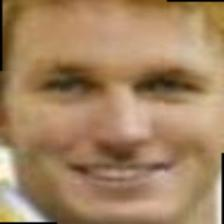

In [28]:
print(a)
transforms.ToPILImage()(b)

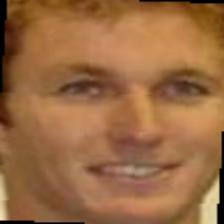

In [29]:
transforms.ToPILImage()(c)

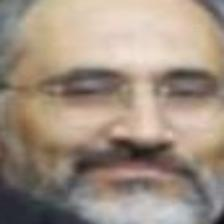

In [35]:
transforms.ToPILImage()(d)

In [24]:
from torch.utils.data import random_split

train_length = int(0.8 * len(dataset))
val_length = test_length = (len(dataset) - train_length) // 2

train_set, val_set, test_set = random_split(dataset, [train_length, val_length, test_length])

train_loader = DataLoader(train_set, batch_size=8, num_workers=0)
val_loader = DataLoader(val_set, batch_size=8, num_workers=0)
test_loader = DataLoader(test_set, batch_size=8, num_workers=0)

In [25]:
hparams = {'lr': 0.001, 'margin': 1}
model = FaceNet(hparams)

In [26]:
tmp_set, _ = random_split(dataset, [10, (len(dataset)-10)])
tmp_loader = DataLoader(tmp_set, batch_size=1, num_workers=0)

In [6]:
logger = TensorBoardLogger('tb_logs', name='FaceNet on LFW')
trainer = pl.Trainer(gpus=1, max_epochs=55, logger=logger)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [7]:
#trainer.fit(model, tmp_loader)
trainer.fit(model, train_loader, val_loader)


  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNet            | 40.5 M
1 | cnn       | Sequential        | 23.5 M
2 | criterion | TripletMarginLoss | 0     
------------------------------------------------
40.5 M    Trainable params
0         Non-trainable params
40.5 M    Total params


1

In [8]:
torch.save(model.state_dict(), 'FaceNetOnLFW.pth')

In [10]:
trainer.test(model, test_loader)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.7452, device='cuda:0'),
 'val_loss': tensor(0.5357, device='cuda:0')}
--------------------------------------------------------------------------------


[{'test_loss': 0.7452296018600464, 'val_loss': 0.535677433013916}]

TP - True Possitive

TN - True Negative

FP - False Positive

FN - False Negative


Accuracy - correct prediction / total predictions

Precision - is my Positive prediction actually Positive?

Recall - rate of correct TRUE predictions of TRUE samples --> predict a TRUE sample as TRUE

Was ist für uns wichtig?
Acuraccy --> richtig predicted?

Why are precision and recall not important?
the different classes are not important to us, we only care about the fact if our model can recognize same faces and not the face of specific people

In [1]:
accuracy = TP + TN / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1_Score = TP / (TP + 0.5 * (FP + FN)) 


NameError: name 'TP' is not defined

In [ ]:
>>> from sklearn.metrics import classification_report
>>> y_true = [0, 1, 2, 2, 2]
>>> y_pred = [0, 0, 2, 2, 1]
>>> target_names = ['class 0', 'class 1', 'class 2']
>>> print(classification_report(y_true, y_pred, target_names=target_names))
              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

>>> y_pred = [1, 1, 0]
>>> y_true = [1, 1, 1]
>>> print(classification_report(y_true, y_pred, labels=[1, 2, 3]))
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.67      0.80         3
   macro avg       0.33      0.22      0.27         3

In [1]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [19]:
y_pred = [1, 1, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.67      0.80         3
   macro avg       0.33      0.22      0.27         3
weighted avg       1.00      0.67      0.80         3



In [ ]:
#Evaluation Trainer
y_true = []
y_pred = []

#face_recognition(path)

for x in eval_dataset:
    img_1 = load_and_transform_img(x)
    img_embedding_tensor, label = embedding_model(img_1)
    closest_label = database.face_recognition(img_embedding_tensor)
    y_true.append(label)
    y_pred.append(closest_label)
    
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
print(classification_report(y_true, y_pred, target_names=target_names))